<center><font size="5"> TP 1 : Approximation polynomiale par les moindres carrés </font> </center>


On considère une suite d’observations $b = \{b_i\}_{i=1,\dots ,m}$ dépendant d'une suite de données $t = \{t_i\}_{i=1,\dots ,m}$, où les $t_i$ sont des nombres distincts. Notre objectif est de trouver un polynôme
$$ p(t) = x_0 + x_1 t + x_2 t^2 + \dots + x_{n-1} t^{n-1} $$
qui approxime au mieux les points $\{(t_i , b_i)\}_{i=1,\dots,m}$ au sens des moindres carrés.

Exprimer le problème à résoudre sous la forme d’un problème de moindres carrés linéaire
$$\min_{x\in \mathbb{R}^n} \Vert Ax - b\Vert_2, A \in \mathbb{R}^{m\times n}, b \in \mathbb{R}^m$$
Vérifier que la solution est unique.

In [4]:
import numpy as np
from numpy import linalg as la

Nous allons utiliser différentes fonctionnalités de la bibliothèque numpy. En voici quelques unes, toutes ne sont pas nécessaires, allez voir leur documentation et faites vos choix. 

<ul>
    <li><tt>np.array</tt> : tableau manipulable, mais le * ne serait pas la multiplication matricielle. </li>
    <ul>
        <li><tt> A.T</tt> : donne la transposée</li>
        <li><tt> A[i,j]</tt> </li>
        <li><tt> A.shape</tt> </li>
        <li><tt> A.dot(B)</tt> : multiplication entre array </li>
    </ul>
    <li><tt>np.matrix</tt> : matrice, le * est la multiplication</li>
    <ul>
        <li><tt> A.T</tt> : donne la transposée</li>
        <li><tt> A[i,j]</tt> </li>
        <li><tt> A.shape</tt> </li>
    </ul>
    <li><tt>np.asmatrix</tt> : gère la conversion array vers matrix</li>
    <li><tt>np.zeros</tt> : attention crée un array </li>
    <li><tt>la.inv</tt> : donne l'inverse</li>
    <li><tt>la.pinv</tt> : donne un pseudo-inverse pour une matrice non carrée (typiquement triangulaire supérieure)</li>
    <li><tt>la.cholesky</tt></li>
    <li><tt>la.qr</tt> : bien lire la documentation et comprendre qu'il faut mettre l'option <tt> 'complete' </tt></li>
    <li><tt>la.norm</tt></li>
</ul>

**Exemple numérique:**

Supposons que nous avons les données suivantes : 

$$\begin{array}{c|ccccccccccc}
t & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 \\ \hline
b & 2 & 7 & 9 & 12 & 13 & 14 & 14 & 13 & 10 & 8 & 4 
\end{array}$$

Commencer par donner la fonction <tt>Vandermonde(n,t)</tt> permettant de calculer la matrice $A$ du système de taille $n$ avec les données $t$. Cette matrice est ce qu'on appelle une matrice de Vandermonde. 

In [22]:
def Vandermonde(n,t):
    res = np.zeros([len(t),n])
    for i in range(len(t)):
        for j in range(n):
            res[i][j] = t[i]**j
    return res
        

In [24]:
t = [11,12,13,14,15,16,17,18,19,20,21]
print(Vandermonde(3,t))

[[  1.  11. 121.]
 [  1.  12. 144.]
 [  1.  13. 169.]
 [  1.  14. 196.]
 [  1.  15. 225.]
 [  1.  16. 256.]
 [  1.  17. 289.]
 [  1.  18. 324.]
 [  1.  19. 361.]
 [  1.  20. 400.]
 [  1.  21. 441.]]


Pour différentes valeurs de n (de $n = 2$ à $n = 5$), calculer en utilisant la méthode
des équations normales le polynôme $p(t)$ qui approxime au mieux les données
fournies (solution $x_{ne}$ ).

Pour cela écrivez une fonction <tt> equanorm(B, t, n) </tt>. Cette fonction renverra également l'erreur relative :
$$\frac{\Vert Ax_{ne} - B\Vert}{\Vert B\Vert}$$

In [53]:
def equanorm(B, t, n):
    A = Vandermonde(n,t)
    p1 = np.dot(A.T,A)
    p2 = np.dot(A.T,B)
    R = la.cholesky(p1)
    y = np.dot(la.inv(R),p2)
    x = np.dot(la.inv(R.T),y)
    err = la.norm(np.dot(A,x) - B)/la.norm(B)
    return x,err
t = [11,12,13,14,15,16,17,18,19,20,21]
b = [2,7,9,12,13,14,14,13,10,8,4]
np.dot(Vandermonde(3,t),equanorm(b,t,3)[0])


array([ 2.22377622,  6.30769231,  9.52447552, 11.87412587, 13.35664336,
       13.97202797, 13.72027972, 12.6013986 , 10.61538462,  7.76223776,
        4.04195804])

Pour différentes valeurs de n (de $n = 2$ à $n = 5$), calculer en utilisant la factorisation QR le polynôme $p(t)$ qui approxime au mieux les données
fournies (solution $x_{qr}$ ).

Pour cela écrivez une fonction <tt> factoQR(B, t, n) </tt>. Cette fonction renverra également l'erreur relative :
$$\frac{\Vert Ax_{qr} - B\Vert}{\Vert B\Vert}$$

In [55]:
def factoQR(B,t,n):
    A = Vandermonde(n,t)
    Q,R = la.qr(A)
    Q1 = np.zeros([len(t),n])
    for i in range(len(t)):
        for j in range(n):
            Q1[i][j] = Q[i][j]
    Q1B = np.dot(Q1.T,B)
    x = np.dot(np.dot(la.inv(R),Q1.T),B)
    err = la.norm(np.dot(A,x) - B)/la.norm(B)
    return x,err
np.dot(Vandermonde(3,t),factoQR(b,t,3)[0])

array([ 2.22377622,  6.30769231,  9.52447552, 11.87412587, 13.35664336,
       13.97202797, 13.72027972, 12.6013986 , 10.61538462,  7.76223776,
        4.04195804])

Ecrire un programme <tt>compare(B,t,n)</tt> affichant de 2 à n les erreurs relatives pour la méthode qr, la méthode des équations normales, et la différence entre les deux normes :
$$\frac{\Vert x_{qr} - x_{ne}\Vert}{\Vert x_{ne}\Vert}$$

Vous afficherez ensuite dans un <tt>plot</tt> les points des erreurs relatives des deux méthodes en fonction de $n$, et dans un autre plot la différence des normes en fonction de $n$.

(utilisez <tt>import matplotlib.pyplot as plt</tt>, et allez voir les fonctionnalités)

Pour les fonctionnalités on pense notamment à :
<ul>
    <li><tt>plt.plot</tt> </li>
    <li><tt>plt.show()</tt></li>
    <li><tt>plt.figure</tt></li>
    <li><tt>np.linspace</tt> : utile pour faire un plot de fonctions, il permet de définir plein d'abscisses réparties équitablement.
</ul>

In [48]:
def compare(B,t,n):
    return la.norm(factoQR(B,t,n) - equanorm(B,t,n)) /(la.norm(equanorm(B,t,n)))
compare(b,t,3)

8.093727061393773e-15

**Pour mieux visualiser**

Toujours en utilisant les fonctionnalités dans matplotlib, faites une fonction <tt>plotapprox(B,t, n)</tt> permettant de visualiser les points initiaux du système (définis par la suite d'abscisses $t$ et d'ordonnées $B$) et la fonction définie par <tt>factoQR(B, t,n)</tt>.

Testez aussi sur les données suivantes : 
$$\begin{array}{c|ccccccccccc}
t & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 \\ \hline
b & 1 & 7 & 10 & 8 & 5 & 4 & 3 & 9 & 12 & 4 & 2
\end{array}$$

NameError: name 'factoQR' is not defined

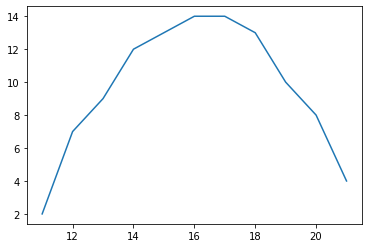

In [3]:
import matplotlib.pyplot as plt
def plotapprox(B,t, n):
    plt.plot(t,B)
    inter = factoQR(B,t,n)
    Y = np.zeros(len(t))
    for i in range(len(t)):
        for j in range(n):
            Y[i] += inter[j] * t[j]**j
    plt.plot(t,Y)
    plt.show()
t = [11,12,13,14,15,16,17,18,19,20,21]
b = [2,7,9,12,13,14,14,13,10,8,4]
plotapprox(b,t,3)